In [121]:
home_price = c(145, 69.9, 315, 144.9, 134.9, 369, 95, 228.9, 
               149, 295, 388.5, 75, 130 , 174, 334.9)

sqft = c(1872, 1954, 4104, 1524, 1297, 3278, 1192, 2252, 
         1620, 2466, 3188, 1061, 1195, 1552, 2901)

exemp_hs = c(0, 0, 1, 0, 0, 1, 0, 1, 0,
            1, 1, 0, 0, 1, 1)

In [161]:
colorize <- function(dataset_column) {
    colors = c()
    for (value in dataset_column) {
        if (value == 0){
            colors <- c(colors,"blue")
        }
        else {
            colors <- c(colors, "red")
        }
    }
    return (colors)
}

In [162]:
data = data.frame("home.price" = home_price, "size.sqft" = sqft, 
                  "exempHS" = exemp_hs)
data$color <- colorize(data$exempHS)

In [162]:
no_good_hs = data[data$exempHS == 0, ] 
with_good_hs = data[data$exempHS == 1, ] 

no_ehs_line = lm (no_good_hs$home.price ~ no_good_hs$size.sqft)
w_ehsline = lm (with_good_hs$home.price ~ with_good_hs$size.sqft)

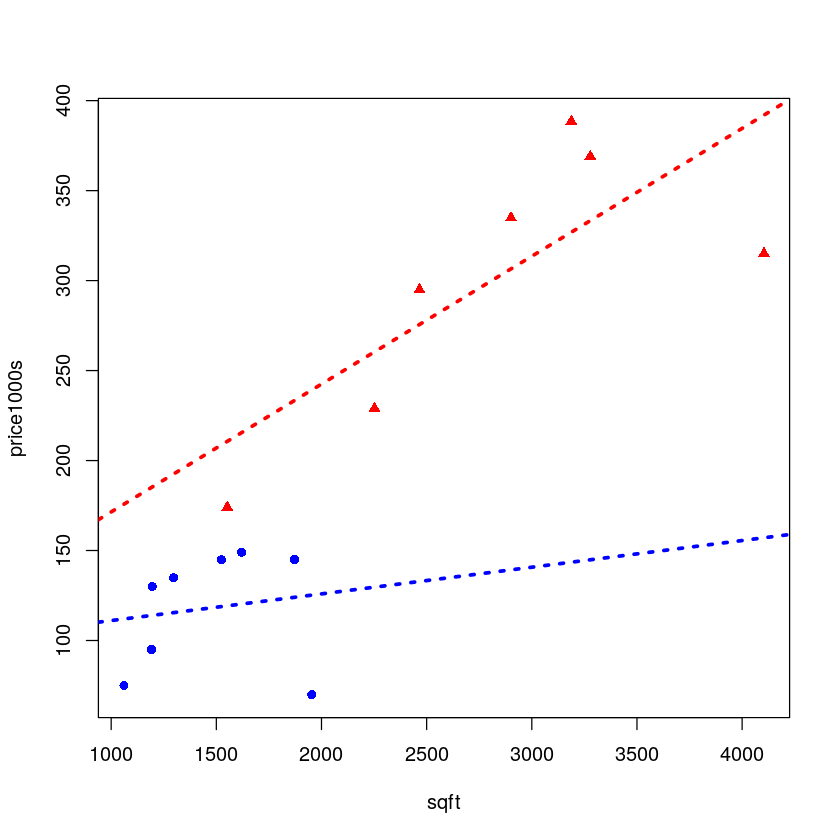

In [188]:
plot(data$size.sqft, data$home.price, pch=(data$exempHS+16), 
     xlab="sqft", ylab="price1000s", col=data$color)

abline(no_ehs_line, col=c("blue"), lwd=3, lty=3)
abline(w_ehsline, col=c("red"), lwd=3, lty=3)

In [176]:
# E(y) + B0 + B1*x1 + B2*x2
# in which E(y) is the dependent variable
# B0 is the intercept
# B1*x1 is the first coefficient * first independent variable
# B2*x2 is the second coefficient * second independent variable

In [122]:
# E(y|Not exemplary) = B0 + B1*x1 + B2*0
# hence, E(y|Not exemplary) = B0 + B1*x1

In [123]:
# E(y|Exemplary) = B0 + B1*x1 + B2*1
# Hence, E(y|Exemplary) = B0 + B1*x1 + B2
# Hence, E(y|Exemplary) = (B0 + B2) + B1*x1

In [126]:
pred_sizeHS = lm(data$home.price ~ data$size.sqft + data$exempHS)

In [131]:
sm1 = summary(pred_sizeHS)
sm1


Call:
lm(formula = data$home.price ~ data$size.sqft + data$exempHS)

Residuals:
   Min     1Q Median     3Q    Max 
-78.45 -27.26  16.22  28.04  64.91 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)    27.07494   33.68996   0.804   0.4372  
data$size.sqft  0.06207    0.02032   3.054   0.0100 *
data$exempHS   98.64787   35.96319   2.743   0.0178 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.65 on 12 degrees of freedom
Multiple R-squared:  0.857,	Adjusted R-squared:  0.8331 
F-statistic: 35.94 on 2 and 12 DF,  p-value: 8.569e-06


In [133]:
0.06207 * 1000

[1] 62.07

In [145]:
equation1 = sum(pred_sizeHS$coefficients[1:3])

# for neighborhoods without exemplary high schools:
equation2 = sum(pred_sizeHS$coefficients[1:2]) 